In [13]:
from google.colab import drive
drive.mount('/content/drive')


In [9]:
import pandas as pd
import re
import spacy
from gensim import corpora, models
import pyLDAvis
import pyLDAvis.gensim_models
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load spacy model
nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])


In [11]:
class TopicModeling:
    def __init__(self, data_path, text_column):
        self.data_path = data_path
        self.text_column = text_column
        self.data = None
        self.texts = []
        self.dictionary = None
        self.corpus = None
        self.lda_model = None
        self.nmf_model = None

    def load_data(self):
        """Load dataset from CSV"""
        self.data = pd.read_csv(self.data_path)
        print(f"Data loaded: {self.data.shape[0]} rows")

    def preprocess_text(self, text):
        """Clean, tokenize, and lemmatize text"""
        text = re.sub(r'\s+', ' ', text)
        text = text.lower()
        doc = nlp(text)
        tokens = [token.lemma_ for token in doc if token.is_alpha and not token.is_stop]
        return tokens

    def preprocess_data(self):
        """Apply preprocessing to all documents"""
        self.texts = [self.preprocess_text(doc) for doc in self.data[self.text_column]]
        print("Preprocessing complete!")

    def build_dictionary_corpus(self):
        """Create dictionary and corpus for LDA"""
        self.dictionary = corpora.Dictionary(self.texts)
        self.corpus = [self.dictionary.doc2bow(text) for text in self.texts]
        print("Dictionary and corpus created!")

    def train_lda(self, num_topics=5):
        """Train LDA model"""
        self.lda_model = models.LdaModel(
            corpus=self.corpus,
            id2word=self.dictionary,
            num_topics=num_topics,
            random_state=42,
            passes=10,
            alpha='auto'
        )
        print("LDA model trained!")

    def display_topics_lda(self, num_words=10):
        """Display topics from LDA"""
        for idx, topic in self.lda_model.print_topics(num_words=num_words):
            print(f"Topic {idx}: {topic}")

    def visualize_lda(self):
        """Visualize LDA topics"""
        pyLDAvis.enable_notebook()
        vis = pyLDAvis.gensim_models.prepare(self.lda_model, self.corpus, self.dictionary)
        return vis

    def train_nmf(self, num_topics=5):
        """Train NMF model"""
        texts_joined = [" ".join(text) for text in self.texts]
        vectorizer = TfidfVectorizer(stop_words="english")
        X = vectorizer.fit_transform(texts_joined)
        self.nmf_model = NMF(n_components=num_topics, random_state=42)
        self.nmf_model.fit(X)
        self.feature_names = vectorizer.get_feature_names_out()
        print("NMF model trained!")

    def display_topics_nmf(self, num_words=10):
        """Display topics from NMF"""
        for idx, topic in enumerate(self.nmf_model.components_):
            top_features = [self.feature_names[i] for i in topic.argsort()[-num_words:]]
            print(f"Topic {idx}: {top_features}")

    def plot_wordcloud(self):
        """Generate wordcloud for LDA topics"""
        for idx, topic in self.lda_model.show_topics(formatted=False):
            words = dict(topic)
            wc = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(words)
            plt.figure()
            plt.imshow(wc, interpolation="bilinear")
            plt.axis("off")
            plt.title(f"LDA Topic {idx}")
            plt.show()


Data loaded: 42115 rows
Preprocessing complete!
Dictionary and corpus created!
LDA model trained!
Topic 0: 0.027*"day" + 0.024*"man" + 0.012*"star" + 0.012*"m" + 0.011*"paris" + 0.010*"london" + 0.010*"charge" + 0.008*"take" + 0.008*"film" + 0.008*"olympic"
Topic 1: 0.022*"win" + 0.021*"england" + 0.019*"world" + 0.013*"final" + 0.013*"league" + 0.013*"manchester" + 0.011*"city" + 0.010*"cup" + 0.009*"match" + 0.009*"second"
Topic 2: 0.035*"say" + 0.015*"bbc" + 0.011*"uk" + 0.010*"new" + 0.009*"people" + 0.007*"government" + 0.007*"party" + 0.007*"tell" + 0.007*"president" + 0.006*"election"
Topic 3: 0.037*"year" + 0.014*"die" + 0.013*"old" + 0.013*"find" + 0.010*"month" + 0.009*"family" + 0.009*"help" + 0.008*"death" + 0.008*"child" + 0.008*"rise"
Topic 4: 0.014*"euro" + 0.012*"trump" + 0.010*"gaza" + 0.008*"campaign" + 0.008*"area" + 0.007*"collapse" + 0.007*"town" + 0.006*"wednesday" + 0.006*"wale" + 0.006*"prince"
NMF model trained!
Topic 0: ['leader', 'election', 'new', 'minister'

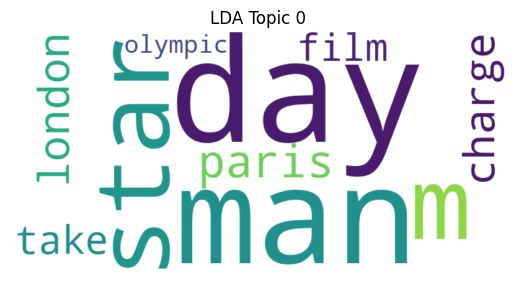

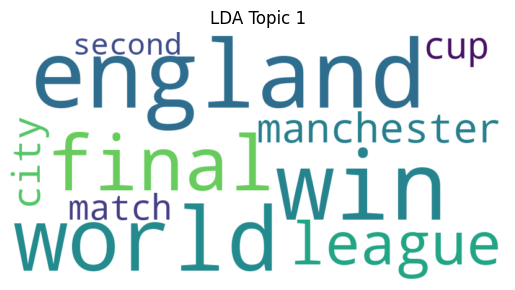

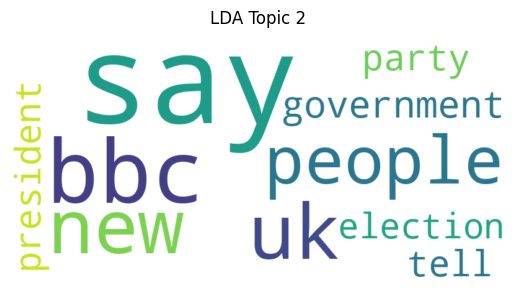

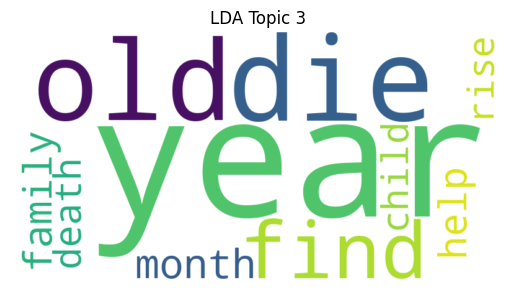

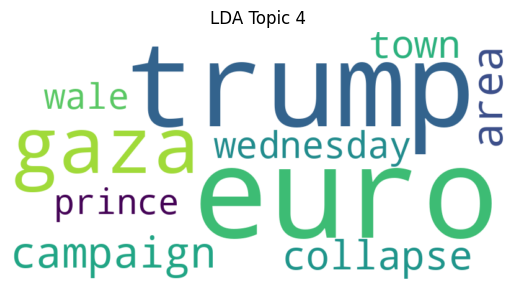

In [12]:
# Path to your dataset
data_path = '/content/drive/MyDrive/Elevvo_Pathway/Task_5/bbc_news.csv'

# نحدد اسم العمود اللي فيه النصوص هنا
tm = TopicModeling(data_path, text_column="description")

# Load and preprocess data
tm.load_data()
tm.preprocess_data()
tm.build_dictionary_corpus()

# Train and display LDA
tm.train_lda(num_topics=5)
tm.display_topics_lda()

# Train and display NMF
tm.train_nmf(num_topics=5)
tm.display_topics_nmf()

# Wordcloud
tm.plot_wordcloud()
